In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Now let’s load the dataset into the panda’s data frame and print its first five rows.

In [107]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [108]:
#Now let’s check the size of the dataset.

In [109]:
df.shape

(366, 12)

In [110]:
#Let’s check which column of the dataset contains which type of data.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [112]:
# As per the above information regarding the data in each column, we can observe that there are no null values.

In [113]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [114]:
'''
Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions
from it or do some modeling on it. 
Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any 
sort in the data inputs.
'''

'\nData Cleaning\nThe data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions\nfrom it or do some modeling on it. \nThose preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any \nsort in the data inputs.\n'

In [115]:
(df.isnull().sum()/len(df))*100

day                       0.000000
pressure                  0.000000
maxtemp                   0.000000
temparature               0.000000
mintemp                   0.000000
dewpoint                  0.000000
humidity                  0.000000
cloud                     0.000000
rainfall                  0.000000
sunshine                  0.000000
         winddirection    0.273224
windspeed                 0.273224
dtype: float64

In [116]:
# So there is one null value in the ‘winddirection’ as well as the ‘windspeed’ column. But what’s up with the column name wind direction?

In [117]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [118]:
# Here we can observe that there are unnecessary spaces in the names of the columns let’s remove that.

In [119]:
df.rename(str.strip,
          axis='columns', 
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [120]:
# Now it’s time for null value imputation.

In [121]:
for col in df.columns:
  
  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)
    
df.isnull().sum().sum()

0

In [122]:
'''
Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. 
It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
Here we will see how to check the data imbalance and skewness of the data.
'''

'\nExploratory Data Analysis\nEDA is an approach to analyzing the data using visual techniques. \nIt is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.\nHere we will see how to check the data imbalance and skewness of the data.\n'

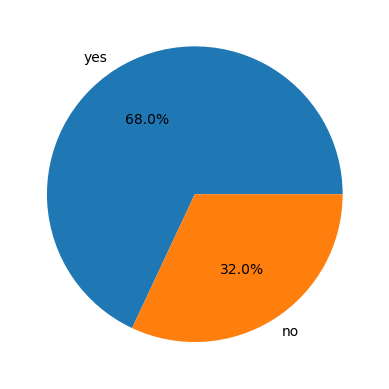

In [123]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [124]:
'''
Categorical Data: Pie charts are ideal for displaying categorical data, where each slice represents a distinct category ('yes' or 'no' in this case).
'''

"\nCategorical Data: Pie charts are ideal for displaying categorical data, where each slice represents a distinct category ('yes' or 'no' in this case).\n"

In [125]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [126]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


In [127]:
# Let’s check the distribution of the continuous features given in the dataset.

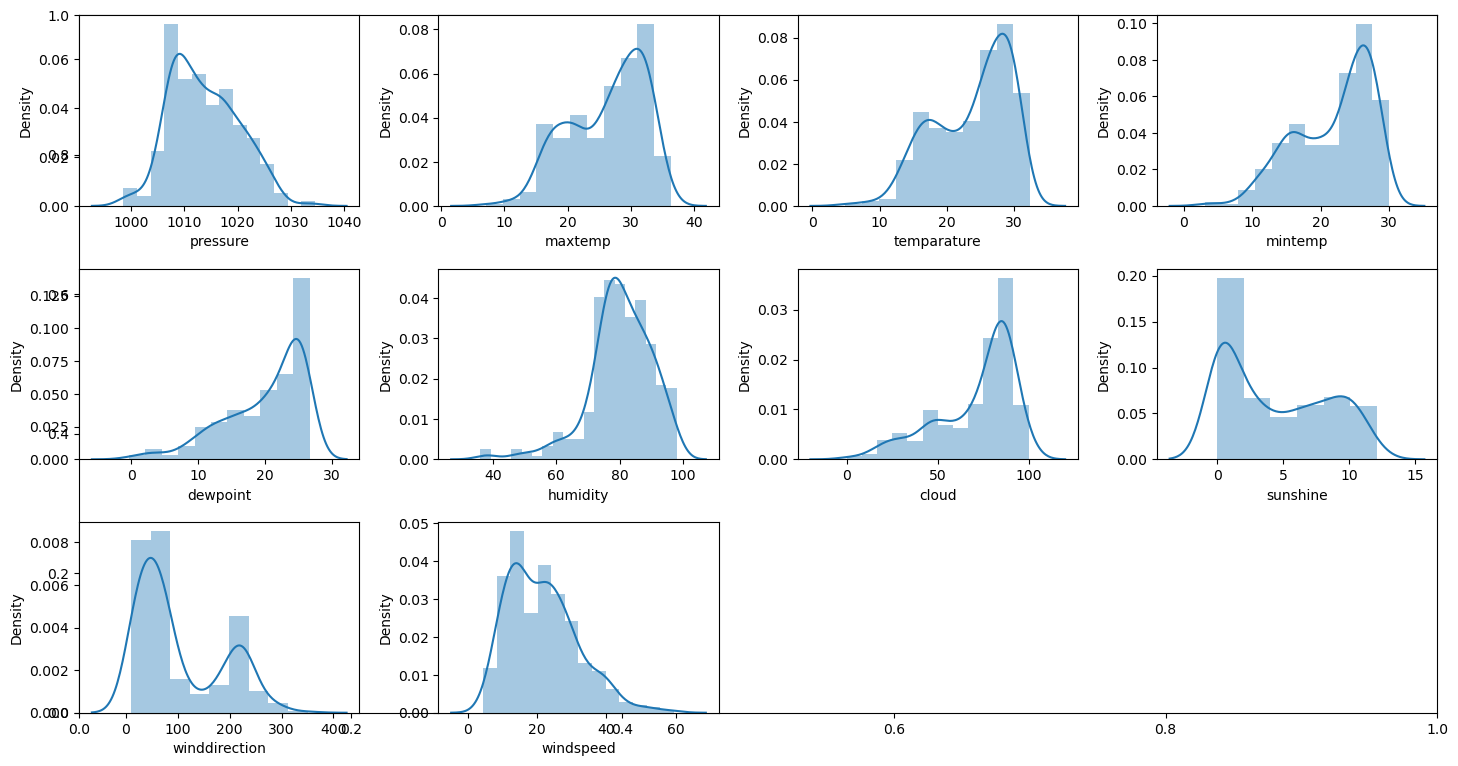

In [128]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [129]:
'''
1. Skewed distributions:
    - pressure and maxtemp show skewed distributions.
    - temparature and mintemp have similar distributions.
2. Bimodal distributions:
    - humidity appears to have two distinct modes.
3. Outliers:
    - dewpoint has outliers on the lower end.
4. Symmetric distributions:
    - cloud and sunshine have relatively symmetric distributions.
'''

'\n1. Skewed distributions:\n    - pressure and maxtemp show skewed distributions.\n    - temparature and mintemp have similar distributions.\n2. Bimodal distributions:\n    - humidity appears to have two distinct modes.\n3. Outliers:\n    - dewpoint has outliers on the lower end.\n4. Symmetric distributions:\n    - cloud and sunshine have relatively symmetric distributions.\n'

In [130]:
# Let’s draw boxplots for the continuous variable to detect the outliers present in the data.

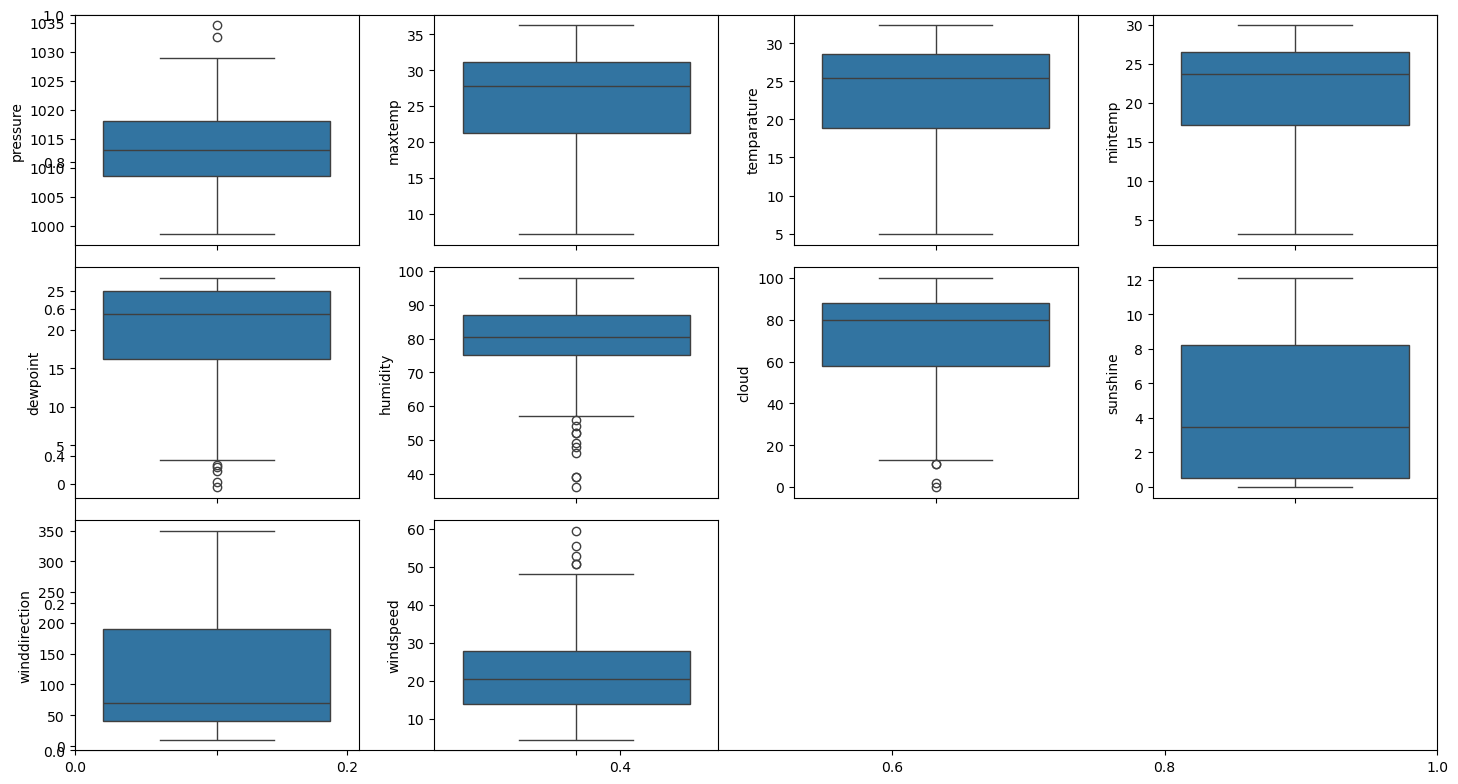

In [131]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [132]:
'''
 1. Outliers:
    - dewpoint has outliers on the lower end.
    - pressure has outliers on the higher end.
2. Skewed distributions:
    - maxtemp and temparature are skewed towards higher values.
3. Consistent distributions:
    - humidity and cloud have consistent distributions.
4. Variability:
    - mintemp has higher variability compared to maxtemp
  '''  

'\n 1. Outliers:\n    - dewpoint has outliers on the lower end.\n    - pressure has outliers on the higher end.\n2. Skewed distributions:\n    - maxtemp and temparature are skewed towards higher values.\n3. Consistent distributions:\n    - humidity and cloud have consistent distributions.\n4. Variability:\n    - mintemp has higher variability compared to maxtemp\n  '

In [133]:
#There are outliers in the data but sadly we do not have much data so, we cannot remove this.

In [134]:
df.replace({'yes':1, 'no':0}, inplace=True)

In [135]:
'''
Sometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model’s performance.
So we must check whether there are highly correlated features in this dataset or not.
'''

'\nSometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model’s performance.\nSo we must check whether there are highly correlated features in this dataset or not.\n'

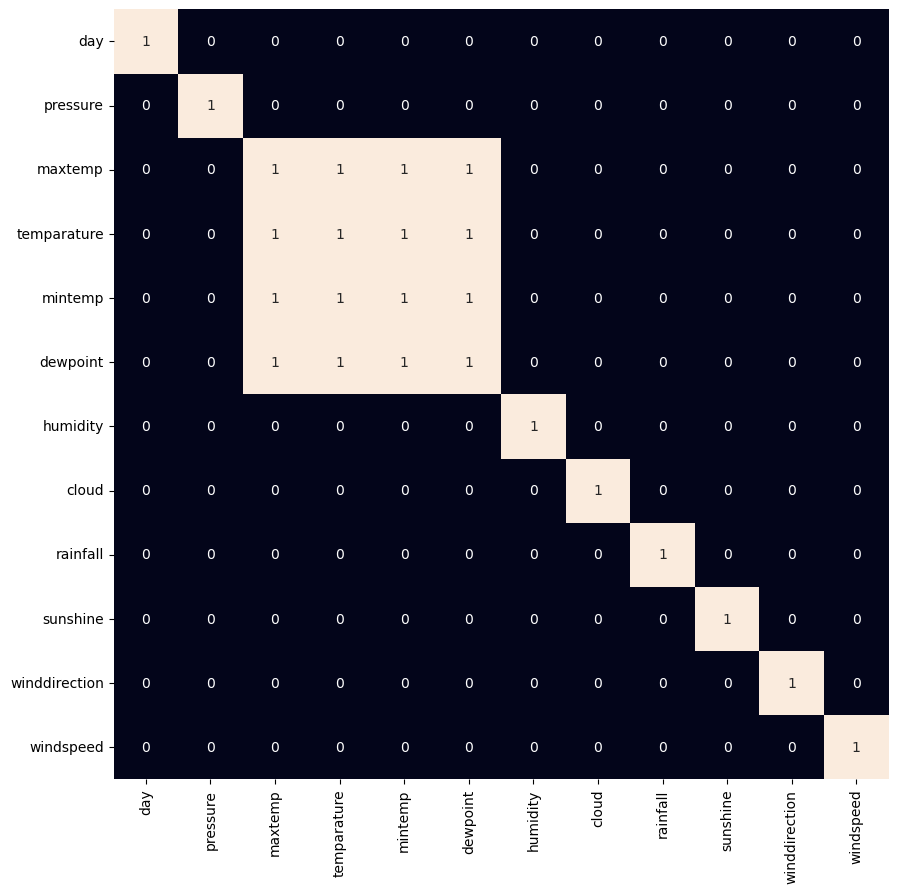

In [136]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [137]:
'''
1. Strong correlations:
    - maxtemp, temparature, mintemp, and dewpoint are highly correlated (>0.8).
2. No correlations:
    - humidity shows no significant correlations with other columns.
3. Day and pressure:
    - day and pressure have no strong correlations with other columns.
'''

'\n1. Strong correlations:\n    - maxtemp, temparature, mintemp, and dewpoint are highly correlated (>0.8).\n2. No correlations:\n    - humidity shows no significant correlations with other columns.\n3. Day and pressure:\n    - day and pressure have no strong correlations with other columns.\n'

In [138]:
'''
Now we will remove the highly correlated features ‘maxtemp’ and ‘mintemp’.
But why not temp or dewpoint? This is because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions.
'''

'\nNow we will remove the highly correlated features ‘maxtemp’ and ‘mintemp’.\nBut why not temp or dewpoint? This is because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions.\n'

In [139]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [140]:
'''
Model Training
Now we will separate the features and target variables and split them into training and testing data by using which we will select the model 
which is performing best on the validation data.
'''

'\nModel Training\nNow we will separate the features and target variables and split them into training and testing data by using which we will select the model \nwhich is performing best on the validation data.\n'

In [141]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [142]:
'''
As we found earlier that the dataset we were using was imbalanced so, we will have to balance the training data before feeding it to the model.
'''

'\nAs we found earlier that the dataset we were using was imbalanced so, we will have to balance the training data before feeding it to the model.\n'

In [143]:
X_train, X_test, \
    Y_train, Y_test = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [144]:
'''
The features of the dataset were at different scales so, normalizing it before training will help us to obtain optimum results
faster along with stable training.
'''

'\nThe features of the dataset were at different scales so, normalizing it before training will help us to obtain optimum results\nfaster along with stable training.\n'

In [145]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [146]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X) 
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  test_preds = models[i].predict_proba(X_test) 
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, test_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666

SVC(probability=True) : 
Training Accuracy :  0.9

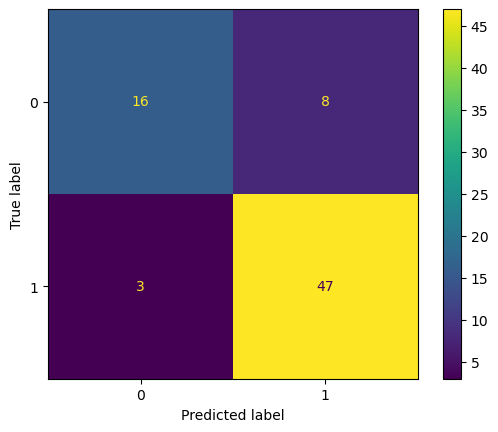

In [147]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

ConfusionMatrixDisplay.from_estimator(models[2], X_test, Y_test)
plt.show()

In [148]:
print(metrics.classification_report(Y_test,
                                    models[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74

